# NR 20MHz 256QAM PDSCH Signal
Simple implementation of NR20M 256QAM PDSCH with DMRS, following MATLAB reference implementation.

Key parameters:
- Bandwidth: 20 MHz
- Numerology: 1 (30 kHz SCS)
- PRBs: 51
- Modulation: 256QAM
- DMRS: Type A, symbols 2 and 11 in each slot


In [1]:
import pyPhyNR as pynr
from pyPhyNR.core.signal_builder import NRSignalBuilder

In [2]:
# Create signal builder for 20MHz, numerology 1 (30kHz SCS)
signal = NRSignalBuilder(bandwidth_mhz=20, numerology=1, cell_id=1)  # Using same cell_id as MATLAB example

# Configure carrier
signal.configure_carrier(
    sample_rate=30.72e6,
    fft_size=1024
).initialize_grid()

# Print carrier configuration
print("Carrier Configuration:")
print(signal.get_carrier_config())


Carrier Configuration:
{'bandwidth_mhz': 20, 'numerology': 1, 'sample_rate': 30720000.0, 'fft_size': 1024, 'num_rb': 51, 'cp_type': 'normal'}


In [3]:
print("Adding PDSCH with DMRS for all slots...")
for slot_idx in range(20):  # 20 slots in 10ms frame
    signal.add_pdsch(
        start_rb=0,
        num_rb=51,  # Full bandwidth
        start_symbol=0,
        num_symbols=14,  # Full slot
        slot_pattern=[slot_idx],
        modulation="QAM256",
        dmrs_positions=[2, 11],
        power=0.0
    )
    print(f"  Added PDSCH for slot {slot_idx}")

Adding PDSCH with DMRS for all slots...
  Added PDSCH for slot 0
  Added PDSCH for slot 1
  Added PDSCH for slot 2
  Added PDSCH for slot 3
  Added PDSCH for slot 4
  Added PDSCH for slot 5
  Added PDSCH for slot 6
  Added PDSCH for slot 7
  Added PDSCH for slot 8
  Added PDSCH for slot 9
  Added PDSCH for slot 10
  Added PDSCH for slot 11
  Added PDSCH for slot 12
  Added PDSCH for slot 13
  Added PDSCH for slot 14
  Added PDSCH for slot 15
  Added PDSCH for slot 16
  Added PDSCH for slot 17
  Added PDSCH for slot 18
  Added PDSCH for slot 19



Plotting resource grid...


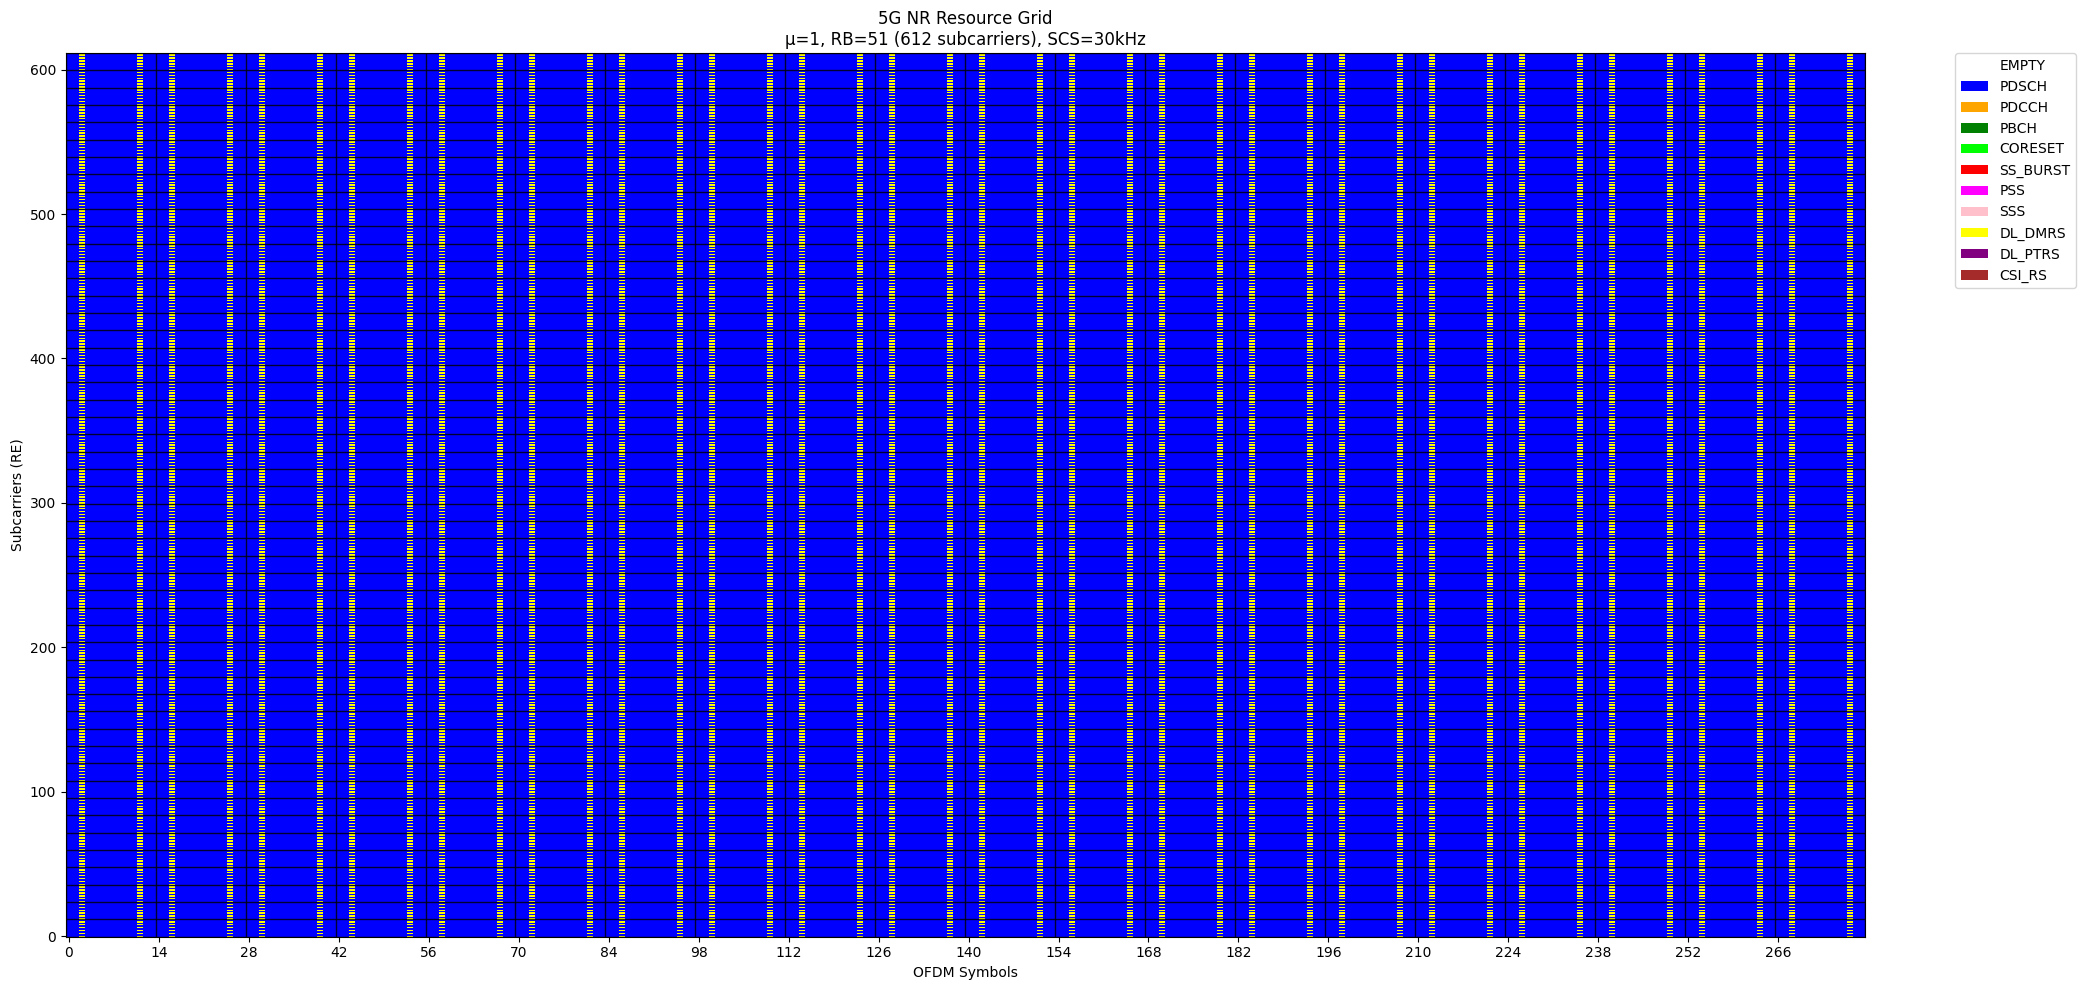


Generating waveform...

Plotting signal analysis...


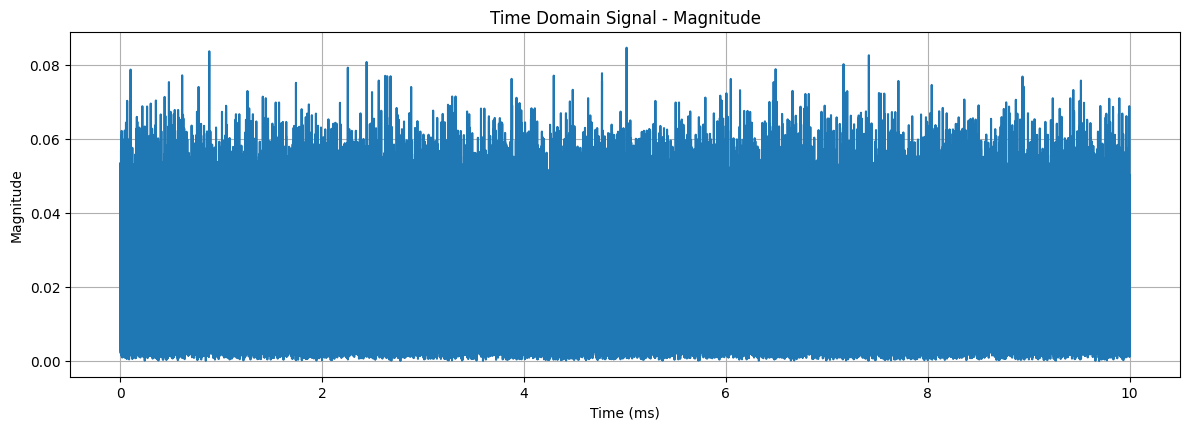

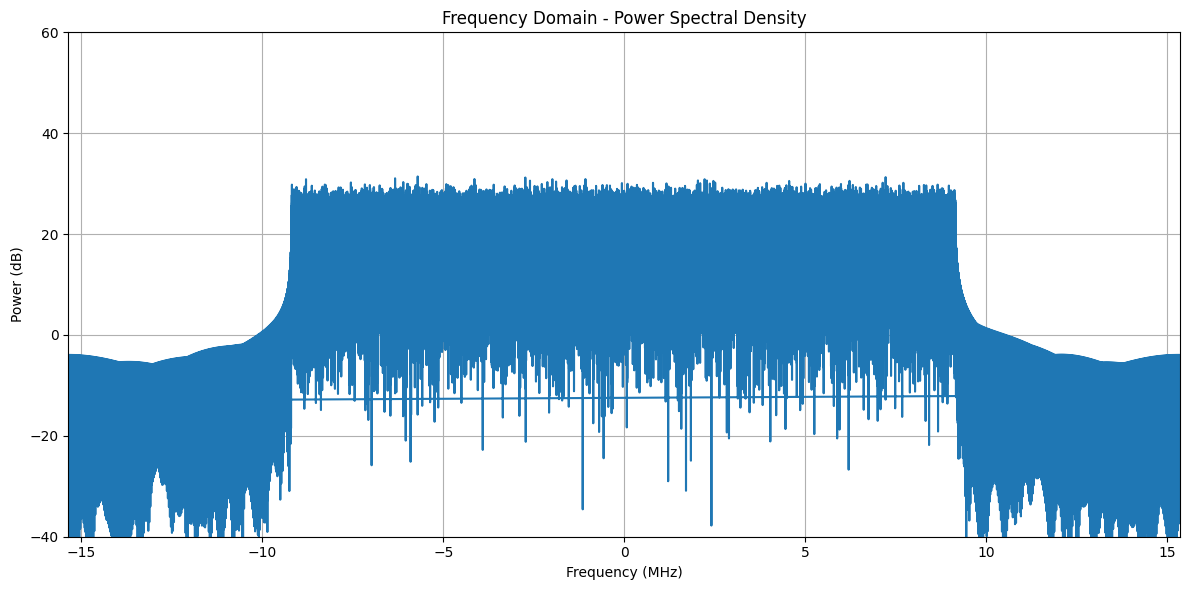

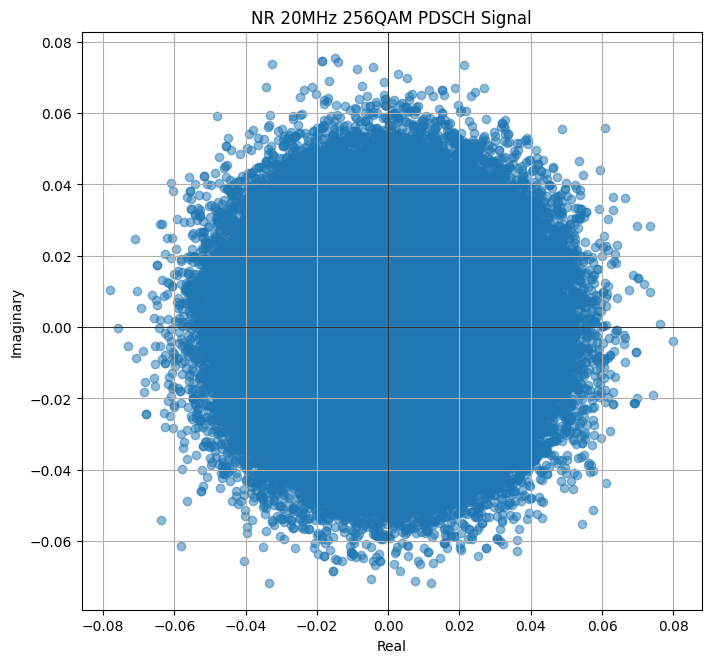

307200


In [4]:
# Visualize resource grid
print("\nPlotting resource grid...")
pynr.utils.plot_grid_dl(signal.carrier_config, signal.grid)

# Generate waveform
print("\nGenerating waveform...")
iq_samples = signal.generate_signal()

# Plot time and frequency domain
print("\nPlotting signal analysis...")
pynr.utils.plot_time_domain(iq_samples, signal.carrier_config)
pynr.utils.plot_frequency_domain(iq_samples, signal.carrier_config)
pynr.utils.plot_constellation(iq_samples, title="NR 20MHz 256QAM PDSCH Signal")
print(len(iq_samples))
